# Infinite Impulse Response-Filters (IIR)

In contrast to FIR-filters, IIR-filters can also include a *feedback* from the output to the input:

<img src='data/images/IIR_filter.jpg' width=500>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

impulse = np.zeros(50)
impulse[10] = 1

## Example 1: Impulse-Filtering

As the name implies, an impulse input to an IIR-filter can have an arbitrarily long effect on the output. For example, take the filter:

\begin{equation}
    y_i = x_i + \frac{y_{i-1}}{2}
\end{equation}

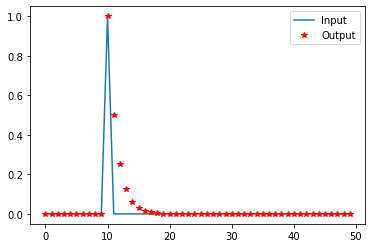

In [2]:
a = [1, -0.5]
b = [1]
impFiltered = signal.lfilter(b,a,impulse)

plt.plot(impulse)
plt.plot(impFiltered,'*r')
plt.legend(['Input', 'Output'])

## Example 2:  Lowpass

A filter-type frequently used for bandpass-filtering are *Butterworth* filters.

First, we demonstrate a low-pass filter:

### Sample-data

Text(0, 0.5, 'Signal')

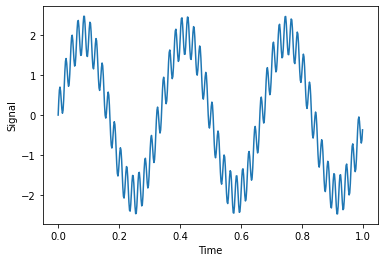

In [3]:
rate = 500
t = np.arange(0,1,1/rate)
freqs = [3, 50]
amps = [2, 0.5]
x = np.zeros(t.shape)
for freq, amp in zip(freqs,amps):
    x += amp * np.sin(2*np.pi*freq*t)
    
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Signal')

### Filter Characteristics

In [4]:
# Filter coefficients
from scipy import signal
Nyq = rate/2
cutoff = 10
b,a = signal.butter(4, cutoff/Nyq)

C:\Programs\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


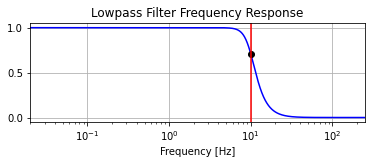

In [5]:
# Plot the frequency response.
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*rate*w/np.pi, np.abs(h), 'b')
plt.semilogx(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='r')
plt.xlim(0, 0.5*rate)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

### Filtered Signal

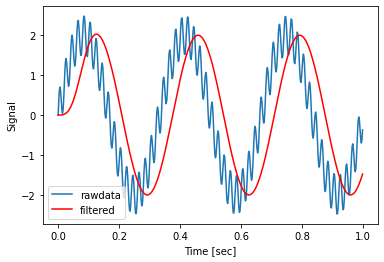

In [6]:
# Apply the filter to the noisy data
filtered = signal.lfilter(b,a,x)

plt.plot(t,x, label='rawdata')
plt.plot(t,filtered, 'r', label='filtered')
plt.xlabel('Time [sec]')\

plt.ylabel('Signal')
plt.legend()

## Example 3: "filtfilt" - Lowpass, without delay

As you can see in the example above, *lfilter* induces a delay. For offline data analysis, this can be eliminated, by filtering the data twice: once forward, and once backward. This eliminates the delay, *but doubles the order of the filter*!

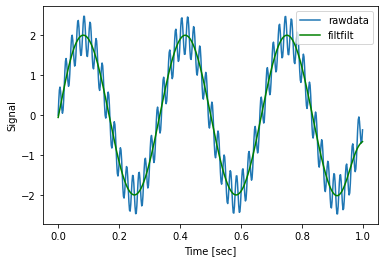

In [7]:
ffiltered = signal.filtfilt(b,a,x)

plt.plot(t,x, label='rawdata')
plt.plot(t,ffiltered, 'g', label='filtfilt')
plt.xlabel('Time [sec]')\

plt.ylabel('Signal')
plt.legend()

## Example 4: Bandpass

Our sample signal consists of two different frequencies. A bandpass, which contains only the upper frequency, should eliminate the lower frequency:

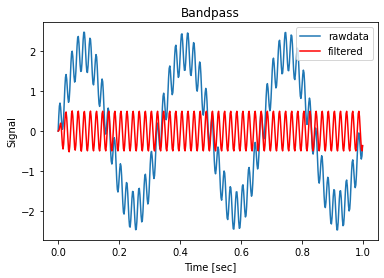

In [8]:
b,a = signal.butter(4, np.r_[20,100]/Nyq, 'bandpass')
filtered = signal.lfilter(b,a,x)

plt.plot(t,x, label='rawdata')
plt.plot(t,filtered, 'r', label='filtered')
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.title('Bandpass')
plt.legend()

Text(0.5, 1.0, 'zoomed in')

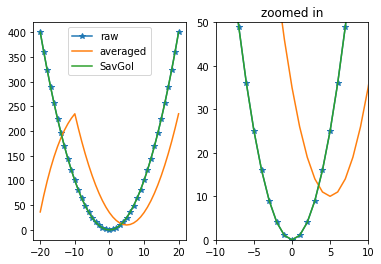

In [9]:
t = np.arange(-20, 21)
x = t**2

win_length = 11

# Filter coefficients
a = 1              # for FIR-filters, "a" is always "1"
b_avg = np.ones(win_length)/win_length    # the weight-coefficients

averaged = signal.lfilter(b_avg, 1, x)
sg_filtered = signal.savgol_filter(x, window_length=win_length, polyorder=3, deriv=0)

fig, axs = plt.subplots(1,2)
axs[0].plot(t,x, '-*', label='raw')
axs[0].plot(t, averaged, label='averaged')
axs[0].plot(t, sg_filtered, label='SavGol')
axs[0].legend()

axs[1].plot(t,x, '-*', label='raw')
axs[1].plot(t, averaged, label='averaged')
axs[1].plot(t, sg_filtered, label='SavGol')
axs[1].set_xlim([-10, 10])
axs[1].set_ylim([0, 50])
axs[1].set_title('zoomed in')


## IIR Filter

A good example of an IIR-filter is the *Butterworth-filter*, also called the *maximally flat* filter because it minimized transient artefacts in the filtered data.

Butterworth filter can be *low-pass*, *high-pass*, or *band-pass*. Below a *bandpass* example.

In [10]:
rate = 10
amps = np.r_[0.5, 1, 0.4]
freqs = np.c_[[0.05, 0.3, 3]]
omega = 2*np.pi * freqs

t = np.arange(0, 40, 1/rate)
x = amps @ np.sin(omega*t)

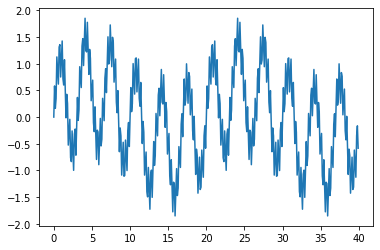

In [11]:
plt.plot(t,x)

In [12]:
# Butterworth filter
nyq = rate/2       # [Hz]
order = 5
band = np.r_[0.2, 1]    # [Hz]

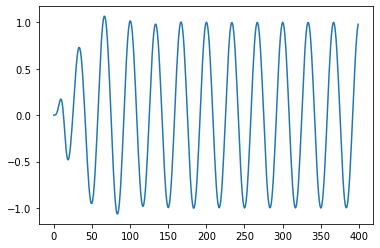

In [13]:
(b_band, a_band) = signal.butter(5, band/nyq, btype='bandpass')
filtered = signal.lfilter(b_band, a_band, x)
plt.plot(filtered)

#### Numerical Problems

For higher frequencies, numerical problems can arise:

In [14]:
# Same as above, only with a higher sampling rate
rate = 1000
nyq = rate/2

t = np.arange(0, 40, 1/rate)
x = amps @ np.sin(omega*t)

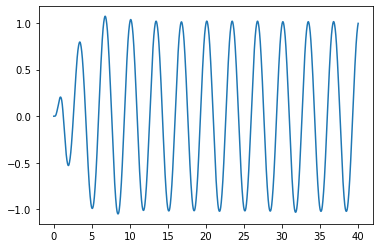

In [15]:
# This one still works
(b_low, a_low) = signal.butter(5, band[1]/nyq, btype='low')
(b_high, a_high) = signal.butter(5, band[0]/nyq, btype='high')

low_filtered = signal.lfilter(b_low, a_low, x)
band_filtered = signal.lfilter(b_high, a_high, low_filtered)
plt.plot(t, band_filtered)

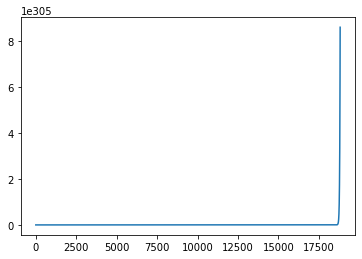

In [16]:
# But not this one
(b_band, a_band) = signal.butter(5, band/nyq, btype='bandpass')
filtered = signal.lfilter(b_band, a_band, x)
plt.plot(filtered)

Therefore it’s recommended to use second-order sections format when filtering, to avoid numerical error with transfer function (ba) format for the bandpass:

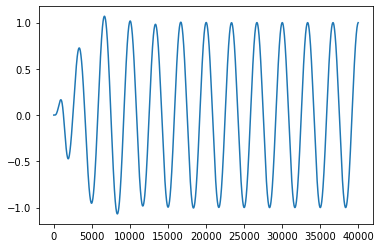

In [17]:
sos = signal.butter(5, band, 'bandpass', fs=rate, output='sos')
filtered = signal.sosfilt(sos, x)
plt.plot(filtered)

[5_FIR_Filters](5_FIR_Filters.ipynb)<img src="data\images\Forward_Backward.png" align='middle'>[5_ImgProc_Intro](5_ImgProc_Intro.ipynb)

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.